In [13]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#đọc dữ liệu, file dữ liệu
data_path = 'C:\\Users\\Qing_Yi99\\codegym\\DAP2308R1\\homework\\'
data_name = 'shopeep_koreantop_clothing_shop_data.csv'

df=pd.read_csv(data_path + data_name, encoding= 'unicode_escape')

#hiển thị 5 dòng đầu tiên
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pk_shop             746 non-null    int64  
 1   date_collected      746 non-null    object 
 2   shopid              746 non-null    int64  
 3   name                746 non-null    object 
 4   join_month          746 non-null    object 
 5   join_day            746 non-null    int64  
 6   join_year           746 non-null    int64  
 7   item_count          746 non-null    int64  
 8   follower_count      746 non-null    int64  
 9   response_time       746 non-null    object 
 10  response_rate       746 non-null    int64  
 11  shop_location       428 non-null    object 
 12  rating_bad          746 non-null    int64  
 13  rating_good         746 non-null    int64  
 14  rating_normal       746 non-null    int64  
 15  rating_star         740 non-null    float64
 16  is_shope

### Vẽ biểu đồ so sánh số lượng shop gia nhập theo các năm.

In [23]:
shop_by_year = df.groupby(['join_year'])['shopid'].nunique().reset_index()
shop_by_year

,join_year,shopid
0,2015,1
1,2016,11
2,2017,72
3,2018,48
4,2019,53
5,2020,130
6,2021,72


In [25]:
shop_by_year['join_year'] = shop_by_year['join_year'].astype(str)

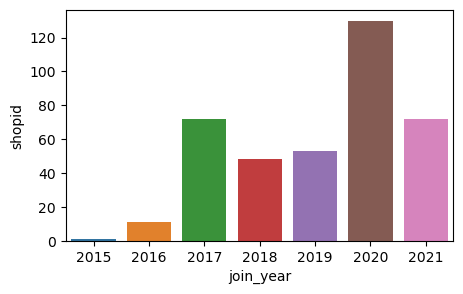

In [26]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(
    y = 'shopid',
    x = 'join_year',
    data = shop_by_year,
    ax = ax
)

plt.show()

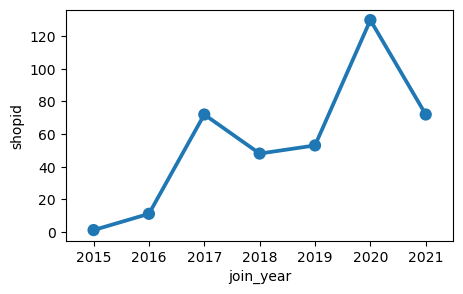

In [27]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.pointplot(
    y = 'shopid',
    x = 'join_year',
    data = shop_by_year,
    ax = ax
)

plt.show()

### Biểu đồ thể hiện độ tương quan tỷ lệ phản hồi với rating tốt

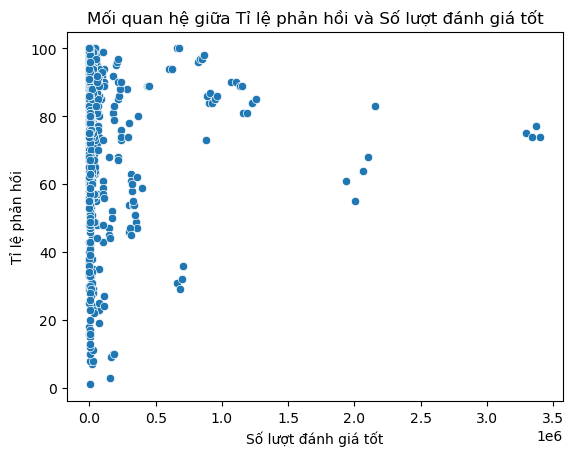

In [34]:
# Vẽ biểu đồ scatterplot
sns.scatterplot(x='rating_good', y='response_rate', data=df)

# Đặt tên cho trục và tiêu đề
plt.xlabel('Số lượt đánh giá tốt')
plt.ylabel('Tỉ lệ phản hồi')
plt.title('Mối quan hệ giữa Tỉ lệ phản hồi và Số lượt đánh giá tốt')

# Hiển thị biểu đồ
plt.show()

### xu hướng của số lượng shop gia nhập theo thời gian

In [36]:
year_month_shop = df.groupby(['join_year','join_month'])['shopid'].nunique().reset_index()
year_month_shop

,join_year,join_month,shopid
0,2015,October,1
1,2016,June,2
2,2016,May,2
3,2016,November,1
4,2016,October,4
5,2016,September,2
6,2017,April,5
7,2017,August,5
8,2017,December,13
9,2017,February,1


In [37]:
year_month_shop['year_month'] = year_month_shop['join_year'].astype(str) +"-"+year_month_shop['join_month'].astype(str)
year_month_shop

,join_year,join_month,shopid,year_month
0,2015,October,1,2015-October
1,2016,June,2,2016-June
2,2016,May,2,2016-May
3,2016,November,1,2016-November
4,2016,October,4,2016-October
5,2016,September,2,2016-September
6,2017,April,5,2017-April
7,2017,August,5,2017-August
8,2017,December,13,2017-December
9,2017,February,1,2017-February


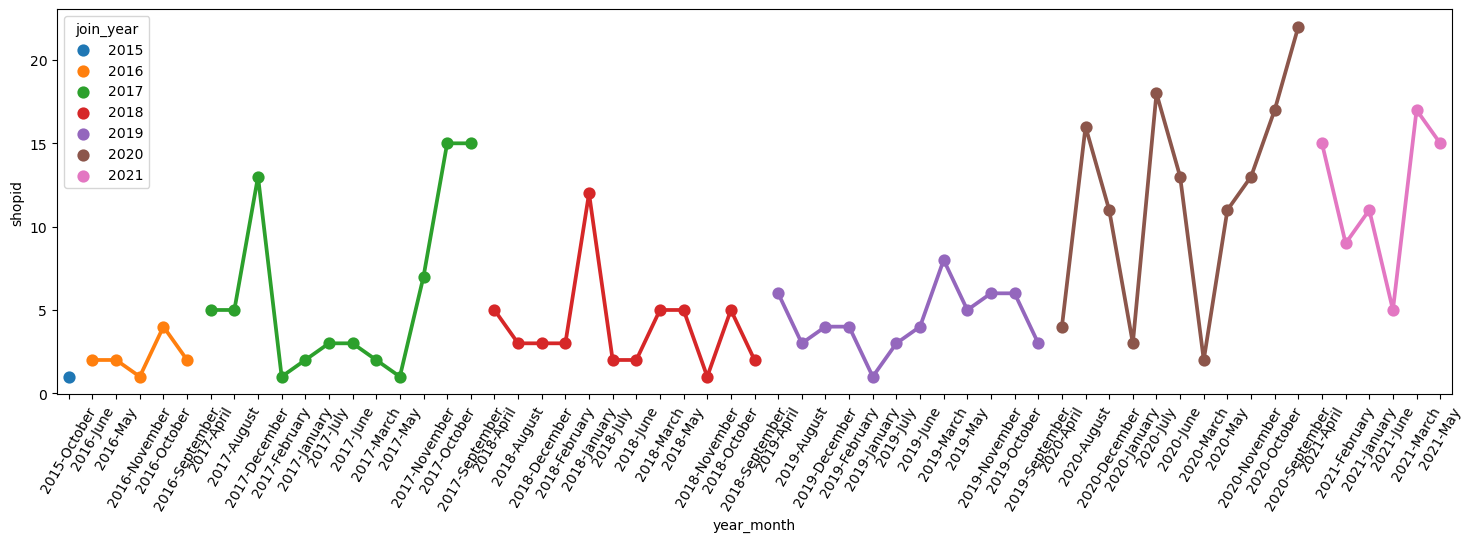

In [39]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(
    y = 'shopid',
    x = 'year_month',
    data = year_month_shop,
    ax = ax,
    hue = 'join_year'
)
ax.set_xticklabels(year_month_shop['year_month'].tolist(), rotation = 60)

plt.show()

### Biểu đồ phân bố điểm đánh giá trung bình

In [40]:
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


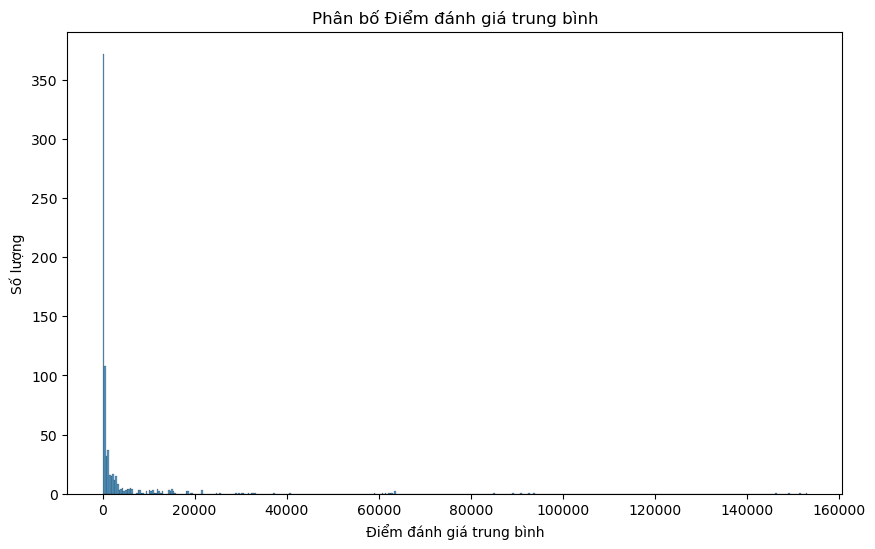

In [44]:
# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rating_normal')

# Đặt tên cho trục và tiêu đề
plt.xlabel('Điểm đánh giá trung bình')
plt.ylabel('Số lượng')
plt.title('Phân bố Điểm đánh giá trung bình')

# Hiển thị biểu đồ
plt.show()